In [186]:
# 1- K-Mean
# 2- Elbow Method
# 3- Silhouette Method

In [187]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [188]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,A,27,70000
1,B,29,90000
2,C,29,62000
3,D,28,60000
4,E,42,150000


Text(0, 0.5, 'Income')

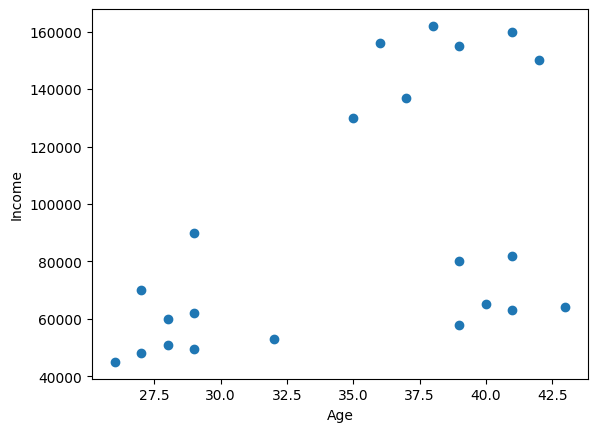

In [189]:
plt.scatter(df.Age, df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [190]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [191]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,A,27,70000,2
1,B,29,90000,2
2,C,29,62000,0
3,D,28,60000,0
4,E,42,150000,1


In [192]:
km.cluster_centers_

array([[3.29090909e+01, 5.62272727e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

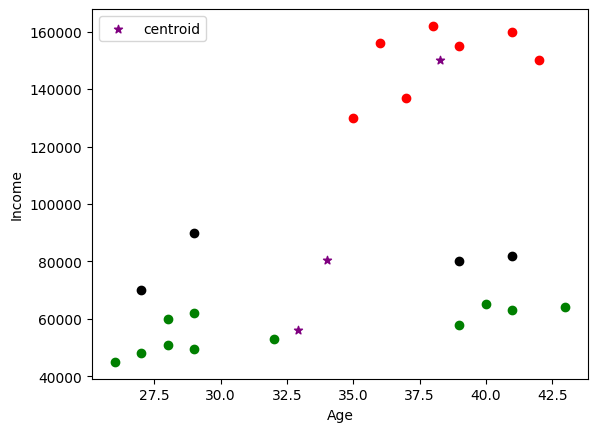

In [193]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple' ,marker='*' ,label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [194]:
# Preprocessing using min max scaler
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])


scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [195]:
df.head()

,Name,Age,Income,cluster
0,A,0.058824,0.213675,2
1,B,0.176471,0.384615,2
2,C,0.176471,0.145299,0
3,D,0.117647,0.128205,0
4,E,0.941176,0.897436,1


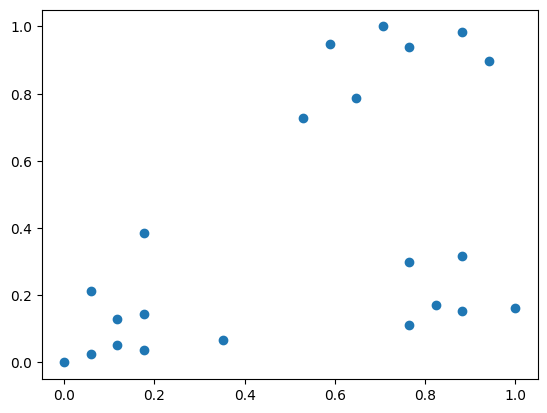

In [196]:
plt.scatter(df.Age,df['Income'])

In [197]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [198]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,A,0.058824,0.213675,1
1,B,0.176471,0.384615,1
2,C,0.176471,0.145299,1
3,D,0.117647,0.128205,1
4,E,0.941176,0.897436,2


In [199]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11728395],
       [0.72268908, 0.8974359 ]])

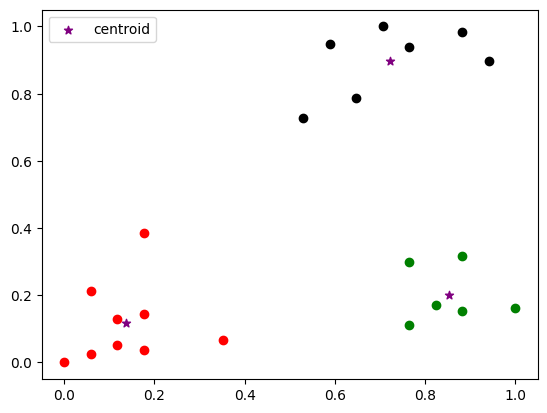

In [200]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [201]:
# //////////////////////
# Elbow Plot Method

In [202]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)
    

C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

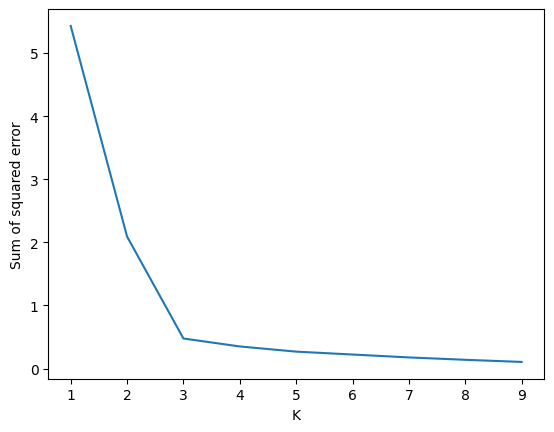

In [203]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [204]:
# //////////////////////////
# The Silhouette Method


In [205]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10
x = df[['Age', 'Income']]

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))
  

C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zahrg\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

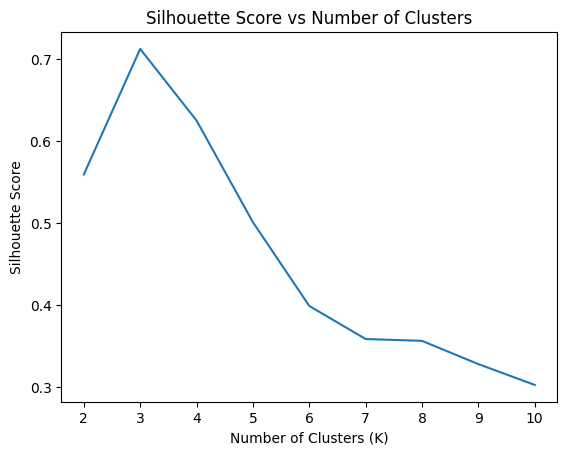

In [206]:
# Plot the Silhouette scores
plt.plot(range(2, kmax+1), sil)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()